# 一、分类问题
对于分类问题：
* 我们只对样本的“硬性”类别感兴趣，即属于哪个类别；
* 我们希望得到“软性”类别，即得到属于每个类别的概率。  

⼀种表⽰分类数据的简单⽅法：独热编码（one-hot encoding）。独热编码是⼀个向量，它的分量和类别⼀样多。类别对应的分量设置为1，其他所有分量设置为0。在我们的例⼦中，标签y将是⼀个三维向量，其中(1, 0, 0)对应于“猫”、(0, 1, 0)对应于“鸡”、(0, 0, 1)对应于“狗”：  
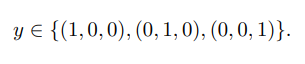

# 二、网络框架
为了估计所有可能类别的条件概率，我们需要⼀个有多个输出的模型，每个类别对应⼀个输出。为了解决线性模型的分类问题，我们需要和输出⼀样多的仿射函数（affine function）。每个输出对应于它⾃⼰的仿射函数。在我们的例⼦中，由于我们有4个特征和3个可能的输出类别，我们将需要12个标量来表⽰权重（带下标的w），3个标量来表⽰偏置（带下标的b）。下⾯我们为每个输⼊计算三个未规范化的预测（logit）：o1、o2和o3。  
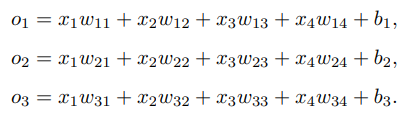  
可以⽤神经⽹络图 图3.4.1来描述这个计算过程。与线性回归⼀样，softmax回归也是⼀个单层神经⽹络。由于计算每个输出o1、o2和o3取决于所有输⼊x1、x2、x3和x4，所以softmax回归的输出层也是全连接层。
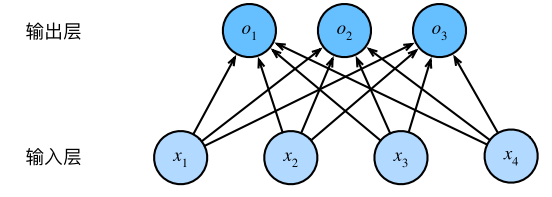  
通过向量形式表达为o = Wx + b，这是⼀种更适合数学和编写代码的形式。由此，我们已经将所有权重放到⼀个3 × 4矩阵中。对于给定数据样本的特征x，我们的输出是由权重与输⼊特征进⾏矩阵-向量乘法再加上偏置b得到的。


# 三、softmax运算
将优化参数以最⼤化观测数据的概率。为了得到预测结果，我们将设置⼀个阈值，如选择具有最⼤概率的标签。  
我们希望模型的输出yˆj可以视为属于类j的概率，然后选择具有最⼤输出值的类别argmaxjyj作为我们的预测。例如，如果yˆ1、yˆ2和yˆ3分别为0.1、0.8和0.1，那么我们预测的类别是2，在我们的例⼦中代表“鸡”。  
softmax函数能够将未规范化的预测变换为⾮负数并且总和为1，同时让模型保持可导的性质。为了完成这⼀⽬标，我们⾸先对每个未规范化的预测求幂，这样可以确保输出⾮负。为了确保最终输出的概率值总和为1，我们再让每个求幂后的结果除以它们的总和。如下式：  
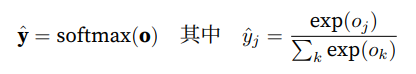  
尽管softmax是⼀个⾮线性函数，但softmax回归的输出仍然由输⼊特征的仿射变换决定。因此，softmax回归是⼀个线性模型（linear model）


# 四、⼩批量样本的⽮量化
为了提⾼计算效率并且充分利⽤GPU，我们通常会对⼩批量样本的数据执⾏⽮量计算。假设我们读取了⼀个批量的样本X，其中特征维度（输⼊数量）为d，批量⼤⼩为n。此外，假设我们在输出中有q个类别。那么⼩批量样本的特征为X ∈ Rn×d，权重为W ∈ Rd×q，偏置为b ∈ R1×q。softmax回归的⽮量计算表达式为：  
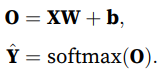  
相对于⼀次处理⼀个样本，⼩批量样本的⽮量化加快了XW的矩阵-向量乘法；


# 五、损失函数
接下来，需要⼀个损失函数来度量预测的效果。我们将使⽤最⼤似然估计，这与在线性回归中的⽅法相同。

## 5.1 对数似然
softmax函数给出了⼀个向量yˆ，我们可以将其视为“对给定任意输⼊x的每个类的条件概率”。例如，yˆ1=P(y =猫 | x)。假设整个数据集{X, Y}具有n个样本，其中索引i的样本由特征向量x(i)和独热标签向量y(i)组成。可以将估计值与实际值进⾏⽐较：  
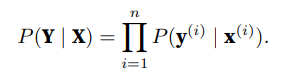  
根据最⼤似然估计，我们最⼤化P(Y | X)，相当于最⼩化负对数似然：  
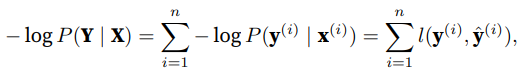  
其中，对于任何标签y和模型预测yˆ，损失函数为：  
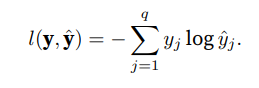

上面的损失函数通常被称为交叉熵损失（cross-entropy loss）。由于y是⼀个⻓度为q的独热编码向量，所以除了⼀个项以外的所有项j都消失了。由于所有yˆj都是预测的概率，所以它们的对数永远不会⼤于0。因此，如果正确地预测实际标签，即如果实际标签P(y | x) = 1，则损失函数不能进⼀步最⼩化。注意，这往往是不可能的。例如，数据集中可能存在标签噪声（⽐如某些样本可能被误标），或输⼊特征没有⾜够的信息来完美地对每⼀个样本分类。

## 5.2 softmax及其导数
由于softmax和相关的损失函数很常⻅，因此我们需要更好地理解它的计算⽅式。  
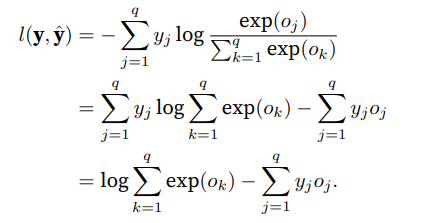   
考虑相对于任何未规范化的预测oj的导数，我们得到：  
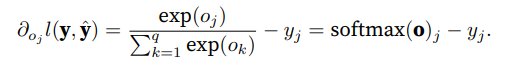  
换句话说，导数是我们softmax模型分配的概率与实际发⽣的情况（由独热标签向量表⽰）之间的差异。从这个意义上讲，这与我们在回归中看到的⾮常相似，其中梯度是观测值y和估计值yˆ之间的差异。

## 5.3 交叉熵损失
现在让我们考虑整个结果分布的情况，即观察到的不仅仅是⼀个结果。对于标签y，我们可以使⽤与以前相同的表⽰形式。唯⼀的区别是，我们现在⽤⼀个概率向量表⽰，如(0.1, 0.2, 0.7)，⽽不是仅包含⼆元项的向量(0, 0, 1)。我们使⽤上面的损失函数来定义损失l，它是所有标签分布的预期损失值。此损失称为交叉熵损失（cross-entropy loss），它是分类问题最常⽤的损失之⼀。接下来我们将通过介绍信息论基础来理解交叉熵损失。

# 六、信息论基础
信息论（information theory）涉及编码、解码、发送以及尽可能简洁地处理信息或数据。
## 6.1 熵
信息论的核⼼思想是量化数据中的信息内容。在信息论中，该数值被称为分布P的熵（entropy）。可以通过以下⽅程得到：  
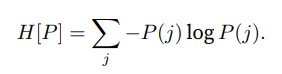  
信息论的基本定理之⼀指出，为了对从分布p中随机抽取的数据进⾏编码，我们⾄少需要H[P]“纳特（nat）”对其进⾏编码。“纳特”相当于⽐特（bit），但是对数底为e⽽不是2。因此，⼀个纳特是 1/log(2) ≈ 1.44⽐特。